# ANALIZA PODATKOV O DIRKI TOUR DE FRANCE


Analizirali bomo podatke o dirki Tour de France. Podatki so zajeti od leta 1903, ko ga je prvič priredila francoska časopisna hiša L'Auto' (športni časopis), saj je upala, da bo napeta kolesarska dirka pritegnila bralce (niso se motili), do trenutne zadnje prireditve iz leta 2025. Vmes manjkajo podatki od leta 1915 do leta 1918 in od leta 1940 do leta 1946, saj takrat zaradi obeh svetovnih vojn TdF ni bil prirejen. 

## Priprava na delo

Preden začnemo pripravimo okolje:


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Uvozimo podatke o etapah:

In [66]:
df = pd.read_csv('./etape.csv',sep=',')


In podatke o zmagovalcih Tour-a:

In [67]:
df2 = pd.read_csv('./letni_zmagovalci.csv', sep=',')


Da bo obdelovanje podatkov lažje, spremenimo podatke o razdalji in povprečni hitrosti tako, da vrednostim v stolpcih odstranimo "km" oz. "km/h" :


In [68]:
df = df[df['razdalja'] != 'ni podatka']
df2 = df2[df2['zmagovalec tdf'] != 'ni podatka']
df = df[df['povprecna_hitrost'] != 'ni podatka']


In [69]:
df['razdalja'] = df['razdalja'].apply(lambda s: float(s[:-3]) if isinstance(s, str) else np.nan)
df['povprecna_hitrost_v_km/h'] = df['povprecna_hitrost'].apply(lambda s: float(s[:-5]) if isinstance(s, str) else np.nan)
del df['povprecna_hitrost']
df = df.reset_index(drop=True)  # popravimo indekse
df.index = df.index + 1  
df

,leto,etapa,razdalja,težavnost,visinska_razlika,profil_etape,ime in priimek zmagovalca,narodnost zmagovalca,ekipa zmagovalca,čas zmagovalca,povprecna_hitrost_v_km/h
1,1903,1.0,467.0,ni podatka,ni podatka,ravninska etapa,Maurice Garin,FR,La Française,17:45:13,26.305
2,1903,2.0,374.0,ni podatka,ni podatka,gorska etapa z ravnim ciljem,Hippolyte Aucouturier,FR,ni podatka,14:28:53,25.826
3,1903,3.0,423.0,ni podatka,ni podatka,ravninska etapa,Hippolyte Aucouturier,FR,ni podatka,17:55:04,23.608
4,1903,4.0,268.0,ni podatka,ni podatka,ravninska etapa,Charles Laeser,CH,ni podatka,8:46:00,30.570
5,1903,5.0,425.0,ni podatka,ni podatka,ravninska etapa,Maurice Garin,FR,La Française,16:26:31,25.849
...,...,...,...,...,...,...,...,...,...,...,...
2149,2025,17.0,160.4,25,1660,ravninska etapa,Jonathan Milan,IT,Lidl - Trek,3:25:30,46.832
2150,2025,18.0,171.5,414,5642,gorska etapa z vzponom na cilju,Ben O'Connor,AU,Team Jayco AlUla,5:03:47,33.873
2151,2025,19.0,93.1,340,3431,gorska etapa z vzponom na cilju,Thymen Arensman,NL,INEOS Grenadiers,2:46:06,33.630
2152,2025,20.0,184.2,107,2916,hribovita etapa z ravnim ciljem,Kaden Groves,AU,Alpecin - Deceuninck,4:06:09,44.899


In [70]:
df2 = df2.reset_index(drop=True)  # popravimo indekse
df2.index = df2.index + 1
df2

,leto,zmagovalec tdf,zmagovalec tdf drzava,zmagovalec tdf starost,zmagovalec specialty
1,1903,Maurice Garin,FR,32,Classic
2,1904,Maurice Garin,FR,33,Classic
3,1905,Louis Trousselier,FR,24,Classic
4,1906,René Pottier,FR,27,Climber
5,1907,Lucien Petit-Breton,FR,24,Climber
...,...,...,...,...,...
108,2021,Tadej Pogačar,SI,22,Climber
109,2022,Jonas Vingegaard,DK,25,GC
110,2023,Jonas Vingegaard,DK,26,GC
111,2024,Tadej Pogačar,SI,25,Climber


# Podatki o etapah


Za začetek si bi radi ustvarili predstavo, kako je Tour sploh zastavljen. Tour je namreč tritedenska dirka, ki poteka v etapah. Etape so enodnevne dirke, ki se med seboj razlikujejo po dolžini in profilu.

## Razdalje, število etap in povprečna hitrost



Najprej bi si radi ogledali, koliko kilometrov so kolesarji prekolesarili vsako leto na Touru.

In [71]:
df['leto'] = df['leto'].astype(str).str.split(',').str[0].astype(int) # ker nam je prej delalo nekaj težave, leto natančno izluščimo iz podatkov
# izračunamo celotno razdaljo na leto
yearly_distance = df.groupby('leto')['razdalja'].sum().reset_index()

min_year = yearly_distance.loc[yearly_distance['razdalja'].idxmin()]
max_year = yearly_distance.loc[yearly_distance['razdalja'].idxmax()]
print(f"Tour z najmanj kilometri je bil leta {int(min_year['leto'])}, ko so kolesarji prevozili {min_year['razdalja']} km, Tour z največ kilometri pa je bil leta {int(max_year['leto'])}, ko so prevozili {max_year['razdalja']} km.")

Tour z najmanj kilometri je bil leta 1904, ko so kolesarji prevozili 1266.0 km, Tour z največ kilometri pa je bil leta 1926, ko so prevozili 5404.0 km.


Vidimo, da je bil najdaljši Tour precej zgodaj, česar nismo pričakovali, in da je bil najkrajši kar drugi (pozneje vidimo, da je bilo na začetku le 6 etap, zato razumemo, zakaj je tudi najkrajši). Poglejmo si še graf za lažjo predstavo:


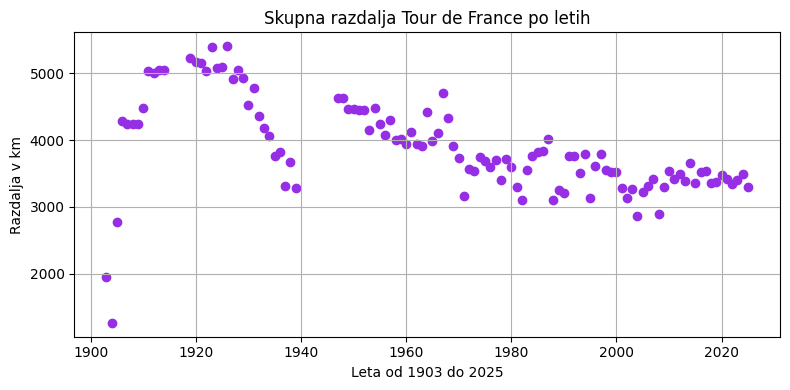

In [72]:
graf1 = df.groupby('leto')['razdalja'].sum()
plt.figure(figsize=(8, 4))
plt.scatter(graf1.index, graf1.values, color = '#962ee6')
plt.xlabel("Leta od 1903 do 2025")
plt.ylabel("Razdalja v km")
plt.title("Skupna razdalja Tour de France po letih")
plt.grid(True)
plt.tight_layout()
plt.show()

Vidimo lahko tudi, da so prvi trije opazno krajši od poznejših, kar si bomo lahko pozneje razlagali s tem, da je bilo veliko manj etap kot zdaj:

In [73]:
tour = df.groupby('leto')['razdalja'].sum().sort_values().to_frame()
tour.sort_values('razdalja', ascending= False)
tour.head(3)

,razdalja
leto,
1904,1266.0
1903,1957.0
1905,2768.0


**NAJDALJŠa IN NAJKRAJŠA ETAPA**

Poglejmo, kako dolge so na Touru posamezne etape:

In [74]:
df_sorted_raz = df.sort_values('razdalja')

In [75]:
največ_vrstica2 = df_sorted_raz.loc[df['razdalja'].idxmax()]
najmanj_vrstica2 = df_sorted_raz.loc[df['razdalja'].idxmin()]
print(f"Najdaljša je bila {int(največ_vrstica2['etapa'])}. etapa iz leta {int(največ_vrstica2['leto'])}, ki jo je zmagal {največ_vrstica2['ime in priimek zmagovalca']} in je bila {največ_vrstica2['profil_etape']}, dolga {največ_vrstica2['razdalja']} km, najkrajša pa je bila  {int(najmanj_vrstica2['etapa'])}. etapa iz leta {int(najmanj_vrstica2['leto'])}, ki jo je zmagal {najmanj_vrstica2['ime in priimek zmagovalca']} in je bila {najmanj_vrstica2['profil_etape']}, dolga {najmanj_vrstica2['razdalja']} km.")


Najdaljša je bila 5. etapa iz leta 1919, ki jo je zmagal Jean Alavoine in je bila ravninska etapa, dolga 482.0 km, najkrajša pa je bila  22. etapa iz leta 1976, ki jo je zmagal Freddy Maertens in je bila ravninska etapa, dolga 6.0 km.


*Komentar: najkrajša etapa je gotovo kronometer oz. etapa, na kateri se dirka na čas. Te so zmeraj krajše od "navadnih" etap in njihov profil je raven, razen ko se gre za gorske kronometre. O njih bomo več povedali pozneje.*

**POVPREČNA DOLŽINA ETAPE**

Zdaj nas zanima še, kako dolga je bila povprečna etapa na vsakem touru. Za to moramo najprej ugotoviti, koliko etap ima vsak Tour.

In [76]:
etape_na_leto = df.groupby('leto')['etapa'].max().rename('št_etap') #izračunamo št. etap na leto

Zdaj, ko imamo podatke o skupni razdalji, prevoženi na Touru, in številu etap na leto, lahko izračunamo še povprečno dolžino etape na leto (ta podatek je bolj zanimiv od razdalje toura, saj ni bilo vedno 21 etap, kot je zdaj):

In [77]:
# mergamo z ostalimi podatki in UPOŠTEVAMO TT 
tour = tour.merge(etape_na_leto, on='leto') #mergamo s 'tour'-om 
tour['povpr_dolžina_etape_v_km'] = (tour['razdalja'] / tour['št_etap']).apply(lambda x: round(x, 2))
tour1 = tour.sort_values('leto')
tour1

,razdalja,št_etap,povpr_dolžina_etape_v_km
leto,,,
1903,1957.0,5.0,391.40
1904,1266.0,5.0,253.20
1905,2768.0,10.0,276.80
1906,4284.0,12.0,357.00
1907,4237.0,13.0,325.92
...,...,...,...
2021,3414.2,21.0,162.58
2022,3349.8,21.0,159.51
2023,3405.1,21.0,162.15


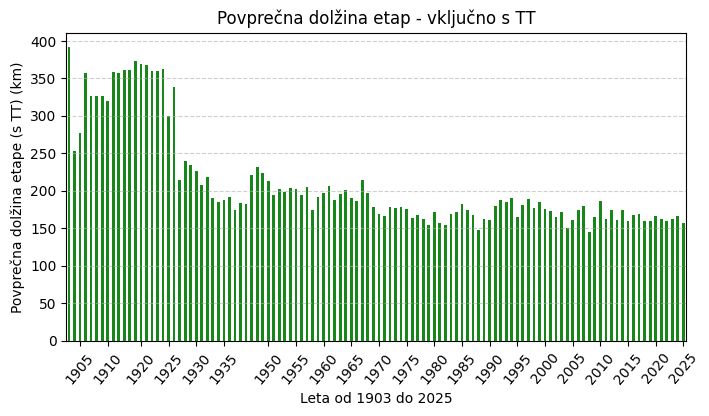

In [78]:
plt.figure(figsize=(8,4)) #prvi graf, ki UPOŠTEVA TT
graf = tour1.groupby('leto')['povpr_dolžina_etape_v_km'].mean()
az = graf.plot(kind='bar', color='#178719')
plt.grid(axis='y', linestyle='--', alpha=0.6)
petletja = [leto for leto in graf.index if leto % 5 == 0]
kam_petletja = [i for i, leto in enumerate(graf.index) if leto % 5 == 0]
plt.xticks(kam_petletja, petletja, rotation=50)

az.set_xlabel("Leta od 1903 do 2025")
az.set_ylabel("Povprečna dolžina etape (s TT) (km)")
az.set_title("Povprečna dolžina etap - vključno s TT")
plt.show()

Zdaj smo upoštevali vse etape, a v zakup moramo všteti, da so nekatere etape 'posebne', saj so krajše. Na njih kolesarji ponavadi individualno tekmujejo, kdo je najhitrejši. Imenujejo se "kronometer" ali Time Trial etapa. Najdaljša dolžina TIme Trial (TT) etape je po predpisih lahko 60km. Ostale etape so ponavadi precej daljše in ker ni v vsakem letu enako število TT etap (in tudi niso enako dolge), nam te TT etape rahlo kvarijo statistiko povprečne dolžine etap, zato bomo tabelo popravili tako, da dodamo še stolpce, ki nam povejo, koliko etap je bilo TT etap in koliko kilometrov so kolesarji prevozili med takimi etapami ter s pomočjo le-teh še enkrat preverili povprečno dolžino etape na Tour.

Najprej filtriramo vse TT etape (pod 60km):

In [79]:
tt_stat = (df[df['razdalja'] <= 60].groupby('leto').agg(tt_st=('etapa', 'count'),tt_razdalja=('razdalja', 'sum')))

In [80]:
#vključimo še TT statistike in izračunamo BREZ TT:
tour1 = tour1.merge(tt_stat, on='leto', how='left').fillna({'tt_st': 0, 'tt_razdalja': 0})  
tour1['povpr_dolžina_etape_v_km2'] = ((tour1['razdalja'] - tour1['tt_razdalja']) / (tour1['št_etap'] - tour1['tt_st'])).apply(lambda x: round(x, 2))
tour1["št_etap"] = tour1["št_etap"].astype(int)
tour1


,razdalja,št_etap,povpr_dolžina_etape_v_km,tt_st,tt_razdalja,povpr_dolžina_etape_v_km2
leto,,,,,,
1903,1957.0,5,391.40,0.0,0.0,391.40
1904,1266.0,5,253.20,0.0,0.0,253.20
1905,2768.0,10,276.80,0.0,0.0,276.80
1906,4284.0,12,357.00,0.0,0.0,357.00
1907,4237.0,13,325.92,0.0,0.0,325.92
...,...,...,...,...,...,...
2021,3414.2,21,162.58,2.0,58.0,176.64
2022,3349.8,21,159.51,2.0,53.9,173.47
2023,3405.1,21,162.15,1.0,22.4,169.13


Zdaj, ko imamo število TT na leto in njihovo skupno razdaljo, lahko izločimo TT etape iz povprečja in izračunamo povprečno dolžino etape še enkrat.

In [81]:
tour1['povpr_dolžina_etape_v_km2']= ((tour1['razdalja'] - tour1['tt_razdalja']) / (tour1['št_etap'] - tour1['tt_st'])).apply(lambda x: round(x, 2))
tour1.sort_values('povpr_dolžina_etape_v_km2', ascending=False).tail(10)


,razdalja,št_etap,povpr_dolžina_etape_v_km,tt_st,tt_razdalja,povpr_dolžina_etape_v_km2
leto,,,,,,
1937,3315.0,19,174.47,0.0,0.0,174.47
1982,3098.0,20,154.90,3.0,137.0,174.18
2022,3349.8,21,159.51,2.0,53.9,173.47
1978,3403.8,21,162.09,2.0,111.3,173.29
2018,3350.5,21,159.55,2.0,66.5,172.84
2020,3482.2,21,165.82,1.0,36.2,172.30
2025,3302.0,21,157.24,2.0,43.9,171.48
2023,3405.1,21,162.15,1.0,22.4,169.13
2004,2857.5,19,150.39,2.0,70.5,163.94


Vidimo, da za leto z najdaljšo povprečno dolžino etape sprememba s pomočjo štetja TT etap ni bila potrebna, v obeh primerih sta namreč Toura s povprečno najdaljšo etapo 2. in 1. Tour de France, kar nas glede na to, da so začeli priprejati TT leta 1934 ne preseneča (vseeno pa je zanimivo, da so najdaljše etape in najdaljši Touri na splošno bili prirejeni na začetku; mislil bi si, da so zdaj, ko je šport vse bolj tekmovalen, etape daljše, pa ni res). Glede Toura z najkrajšo povprečno etapo pa se podatek spremeni: pred popravkom je bil to Tour iz leta 1990, po popravku pa Tour iz leta 2011. Vidimo tudi, da sta si grafa pred izločitvijo TT etap in po njej precej podobna.

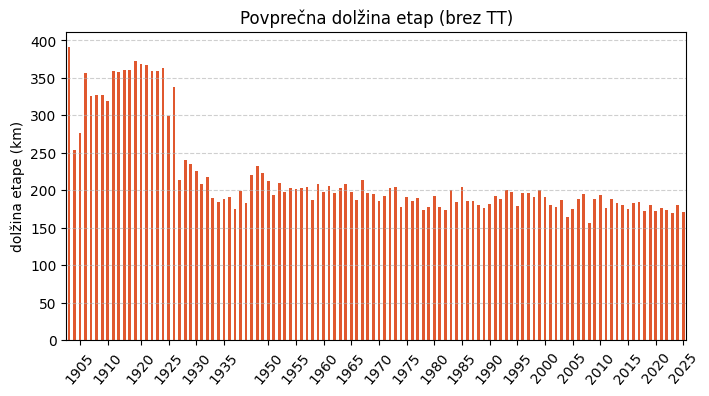

In [82]:
#drugi graf, ki IZVZAME TT:
plt.figure(figsize=(8,4))
graf = tour1.groupby('leto')['povpr_dolžina_etape_v_km2'].mean()
ay = graf.plot(kind='bar', color='#e0582f')
petletja = [leto for leto in graf.index if leto % 5 == 0]
kam_petletja = [i for i, leto in enumerate(graf.index) if leto % 5 == 0]
plt.xticks(kam_petletja, petletja, rotation=50)
ay.set_xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.6)
ay.set_ylabel("dolžina etape (km)")
ay.set_title("Povprečna dolžina etap (brez TT)")
plt.show()

Vidimo lahko, da so ne glede na to, ali zraven štejemo TT etape ali ne, bile etape in Tour najdaljši v 20ih letih prejšnjega stoletja, kar je zanimivo (mislili bi si, da s tem, ko v ta (zelo popularen) šport prihaja vedno več sponzorjev in ekip, tour postaja bolj senzionalističen in tako tudi daljši). Veliko povprečno razdaljo etap čisto na začetku prirejanja Toura si lahko razlagamo, saj spodaj vidimo, da je bilo takrat le 5 etap, ki so posledično morale biti daljše. 

Poglejmo ju drug ob drugem:


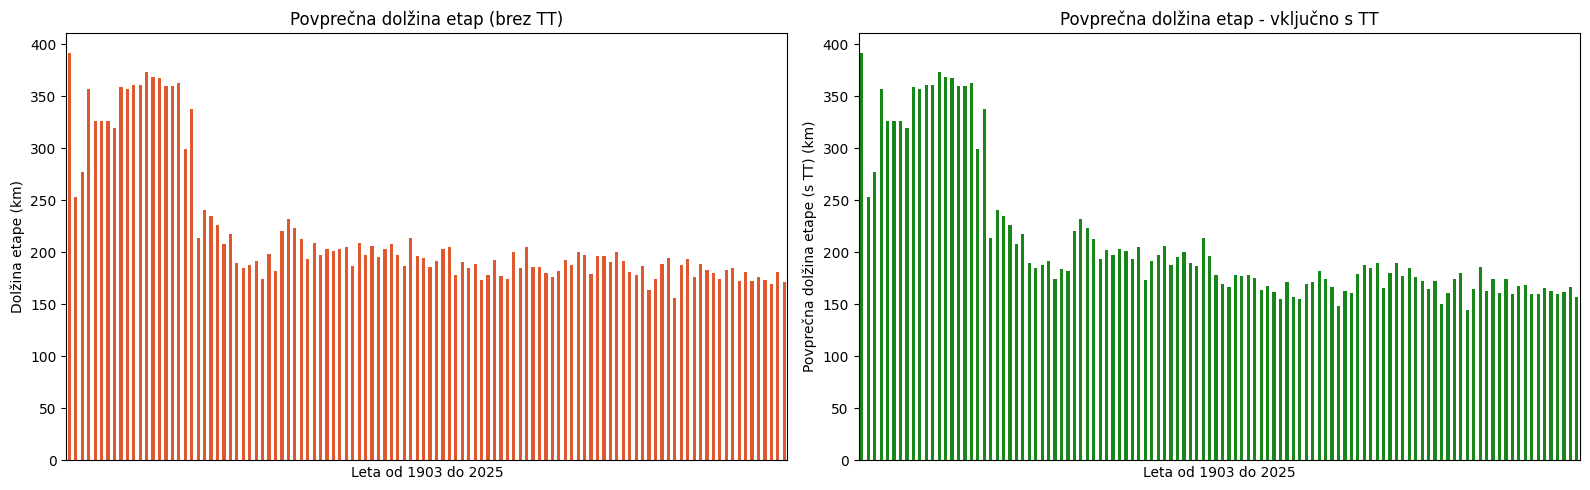

In [83]:
brez_tt = tour1.groupby('leto')['povpr_dolžina_etape_v_km2'].mean()
s_tt = tour1.groupby('leto')['povpr_dolžina_etape_v_km'].mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
# brez TT
brez_tt.plot(kind='bar', color='#e0582f', ax=ax1)
ax1.set_xlabel("Leta od 1903 do 2025")
ax1.set_ylabel("Dolžina etape (km)")
ax1.set_title("Povprečna dolžina etap (brez TT)")
ax1.set_xticks([]) 
# s TT
s_tt.plot(kind='bar', color='#178719', ax=ax2)
ax2.set_xlabel("Leta od 1903 do 2025")
ax2.set_ylabel("Povprečna dolžina etape (s TT) (km)")
ax2.set_title("Povprečna dolžina etap - vključno s TT")
ax2.set_xticks([])

plt.tight_layout()
plt.show()


*Komentar: Ko v tem podpoglavju analiziramo povprečne dolžine etap, ugotovimo, da so povprečno najdaljše etape v 20ih letih prejšnjega stoletja. Ta podatek se ujema s prejšnjo analizo dolžine Toura, kjer smo ugotovili, da so bili Touri prav tako najdaljši v 20ih letih prejšnjega stoletja.*

**DOLŽINA TIME TRIAL DELA NA TOUR DE FRANCE**

Sproti lahko pogledamo tudi, katera leta je bilo največ prevoženih kilometrov pri TT etapah in koliko je bilo največje število TT etap:





In [84]:
tour1 = tour1.reset_index()
tour1['tt_st'] = tour1['tt_st'].astype(int) #popravimo iz floata v int
tour1['št_etap'] = tour1['št_etap'].astype(int)
tour1.sort_values('tt_razdalja',ascending=False).head(10)

,leto,razdalja,št_etap,povpr_dolžina_etape_v_km,tt_st,tt_razdalja,povpr_dolžina_etape_v_km2
74,1988,3111.0,21,148.14,5,222.0,180.56
65,1979,3718.5,24,154.94,4,162.8,177.78
69,1983,3551.5,21,169.12,4,138.0,200.79
68,1982,3098.0,20,154.90,3,137.0,174.18
71,1985,3820.0,21,181.90,3,130.0,205.00
76,1990,3215.4,20,160.77,3,123.5,181.88
58,1972,3570.5,20,178.53,3,121.0,202.91
66,1980,3591.9,21,171.04,3,118.9,192.94
73,1987,4011.0,24,167.12,3,115.0,185.52
105,2019,3365.8,21,160.28,3,114.3,180.64


In [85]:
največje_število_tt = tour1.loc[tour1['tt_st'].idxmax()]
print(f"Največje število kronometrov na enem Tour-u je bilo {int(največje_število_tt['tt_st'])} etap leta {int(največje_število_tt['leto'])}, ko so na TT delu Toura prevozili kar {največje_število_tt['tt_razdalja']} km.")

Največje število kronometrov na enem Tour-u je bilo 5 etap leta 1988, ko so na TT delu Toura prevozili kar 222.0 km.


**PORAZDELITEV ŠTEVILA ETAP NA TOUR-U**

Sproti tudi opazimo, da nima vsak Tour enakega števila etap, zato nas zanima, kako pogosto je določeno število etap na leto. To bomo predstavili s tortnim diagramom:


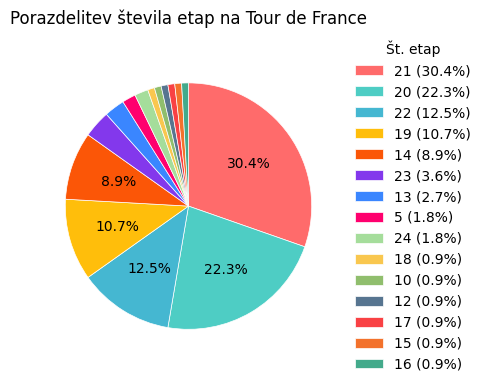

In [86]:
etape_stev = tour['št_etap'].value_counts()

plt.figure(figsize=(8, 4))
patches, texts, autotexts = plt.pie(etape_stev, labels=None,  
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '',  # Da se oznake za procente ne prekrivajo, iločimo vse, ki so manjši od 5%
    startangle=90,
    counterclock=False,
    colors=['#ff6b6b', '#4ecdc4', '#45b7d1', '#ffbe0b', '#fb5607','#8338ec', '#3a86ff', '#ff006e', '#a5dd9b', '#f9c74f', '#90be6d', '#577590', '#f94144', '#f3722c', '#43aa8b'],wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

plt.legend(handles=patches,labels=[f'{int(st)} ({pct:.1f}%)' for st, pct in zip(etape_stev.index, etape_stev / etape_stev.sum() * 100)],title='Št. etap',loc='center left',bbox_to_anchor=(1, 0.5),frameon=False)
plt.title('Porazdelitev števila etap na Tour de France', pad=20)
plt.show()

Če pogledamo še stolpični diagram, lahko vidimo, da se je število etap na leto (prbl.21) od sedemdesetih let prejšnjega stoletja precej ustalilo (tako nas ne preseneča, da je največji delež Tourov imelo 21 etap), vmes je število nihalo nekako med 15 in 24 etapami, čisto na začetku prirejanja pa je bilo v primerjavi z zdaj zelo malo etap.

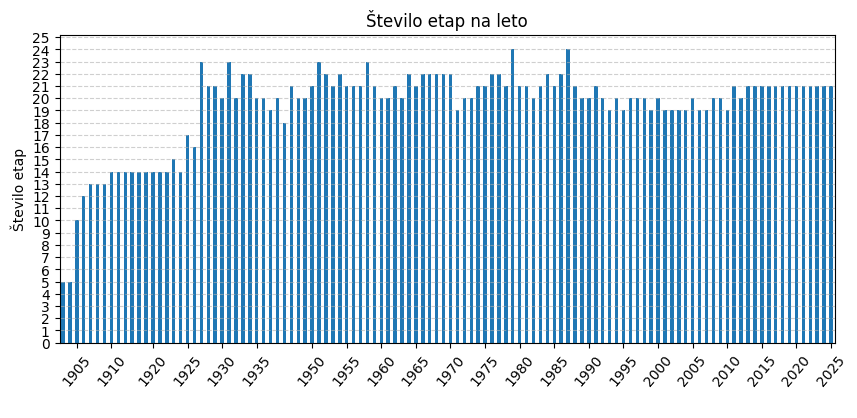

In [87]:
graf = tour.groupby('leto')['št_etap'].mean()
graf4 = graf.plot(kind='bar', figsize=(10, 4))
petletja = [leto for leto in graf.index if leto % 5 == 0]
kam_petletja = [i for i, leto in enumerate(graf.index) if leto % 5 == 0]
plt.xticks(kam_petletja, petletja, rotation=50)
plt.yticks([i for i in range(0, 26)], [i for i in range(0, 26)])
graf4.set_xlabel(" ")
graf4.set_ylabel("Število etap")
plt.grid(axis='y', linestyle='--', alpha=0.6)
graf4.set_title("Število etap na leto")
plt.show()

**NAJHITREJŠE IN NAJPOČASNEJŠE ETAPE**




Poglejmo, kaj sta najvišja in najnižja hitrost, s katero je vozil zmagovalec etape:

In [88]:
največ_vrstica1 = df.loc[df['povprecna_hitrost_v_km/h'].idxmax()]
najmanj_vrstica1 = df.loc[df['povprecna_hitrost_v_km/h'].idxmin()]

print(f"Najvišja povprečna hitrost zmagovalca je bila {največ_vrstica1['povprecna_hitrost_v_km/h']} km/h na {največ_vrstica1['etapa']}. etapi leta {int(največ_vrstica1['leto'])}, ko je zmagal {največ_vrstica1['ime in priimek zmagovalca']}, najnižja povprečna hitrost zmagovalca pa je bila  {najmanj_vrstica1['povprecna_hitrost_v_km/h']} km/h na {najmanj_vrstica1['etapa']}. etapi leta {int(najmanj_vrstica1['leto'])}, ko je zmagal {najmanj_vrstica1['ime in priimek zmagovalca']}." )

Najvišja povprečna hitrost zmagovalca je bila 57.77 km/h na 4.0. etapi leta 2013, ko je zmagal Simon Gerrans, najnižja povprečna hitrost zmagovalca pa je bila  9.551 km/h na 3.0. etapi leta 1970, ko je zmagal Italo Zilioli.


Podatek o hitrosti 9,551 km/h se nam zdi sumljiv, ga preverimo. Ugotovimo, da je 3. etapa leta 1970 bila razdeljena na dva dela, ki sta ekipni dirki na čas. Tega naša koda in tudi sama stuktura našega pobiranja podatkov ni predvidela, zato bomo to etapo izključili iz statistike in vzeli tretjo (tudi druga najpočasnejša etapa ima namreč isto strukturo) najpočasnejšo etapo: 

In [89]:
najmanj_vrstica1 = df.sort_values(by='povprecna_hitrost_v_km/h').iloc[2]
print(f"Najvišja povprečna hitrost zmagovalca je bila {največ_vrstica1['povprecna_hitrost_v_km/h']} km/h na {največ_vrstica1['etapa']}. etapi leta {int(največ_vrstica1['leto'])}, ko je zmagal {največ_vrstica1['ime in priimek zmagovalca']}, najnižja povprečna hitrost zmagovalca pa je bila  {najmanj_vrstica1['povprecna_hitrost_v_km/h']} km/h na {najmanj_vrstica1['etapa']}. etapi leta {int(najmanj_vrstica1['leto'])}, ko je zmagal {najmanj_vrstica1['ime in priimek zmagovalca']}." )

Najvišja povprečna hitrost zmagovalca je bila 57.77 km/h na 4.0. etapi leta 2013, ko je zmagal Simon Gerrans, najnižja povprečna hitrost zmagovalca pa je bila  18.86 km/h na 15.0. etapi leta 1927, ko je zmagal Nicolas Frantz.


## Profil in težavnost etap

Tour de France je ponavadi sestavljen iz nekaj TT etap (kot smo prej videli, jih je bilo vedno <= 5). Ostalo so daljše etape, ki jih ponavadi razporedimo na ravninske, hribovite in gorske etape. Naša spletna stran obravbnava posebej, ko je pri hriboviti ali gorski etapi vzpon na cilju in ko je raven cilj, tako da imamo 5 različnih vrst etap poleg TT etap. V tem poglavju nas bodo najbolj zanimale gorske etape in
težavnost etap. To merimo z lestvico 'ProfileScore', ki je razložena na  spletni strani, iz katere smo pobrali podatke (https://www.procyclingstats.com/info/profile-score-explained): "We included three variables into our PCS ProfileScore formula:
- <p>Position of climb from finish</p>
- <p>Steepness</p>
- <p>Length of the climb</p>

First we compute the score for each individual climb in the stage by the following formula:
<p>([Steepnes] / 2)^2 * [Length in KM].</p>
Then we multiply this score by a factor dependent of the distance from the finish line."

Tako lahko s to lestvico preverimo, katere etape so bile najtežje (in tako vidimo, kateri kolesar (zmagovalec te etape) je res najboljši plezalec na eni etapi).


**NAJVIŠJE TOČKOVANJE NA PROFILESCORE LESTVICI IN POZITIVNA VIŠINSKA RAZLIKA**

Poglejmo, katere etape so imele največjo pozitivno višinsko razliko:

In [90]:
# ugotovimo, da nam podatki o višini in PS delajo probleme, zato jih spremenimo v numerične vrednosti:
df['visinska_razlika'] = pd.to_numeric(df['visinska_razlika'], errors='coerce')
df['težavnost'] = pd.to_numeric(df['težavnost'],errors='coerce')
#zdaj poskusimo narediti lestvico za tezavnost :
top10_tezavnost = pd.DataFrame(df[df['težavnost'].notna()].sort_values('težavnost', ascending=False).head(10)[['leto', 'etapa', 'težavnost', 'visinska_razlika', 'ime in priimek zmagovalca']])
top10_tezavnost['etapa'] = top10_tezavnost['etapa'].astype(int)
#enako za visinsko razliko
top10_visinska = pd.DataFrame(df[df['visinska_razlika'].notna()].sort_values('visinska_razlika', ascending=False).head(10)[['leto', 'etapa', 'težavnost', 'visinska_razlika', 'ime in priimek zmagovalca']]) 
top10_visinska['etapa'] = top10_visinska['etapa'].astype(int)
top10_visinska

,leto,etapa,težavnost,visinska_razlika,ime in priimek zmagovalca
1484,1992,13,608.0,6974.0,Claudio Chiappucci
1105,1974,11,439.0,6659.0,Vicente López
1298,1983,18,572.0,6589.0,Jacques Michaud
1082,1973,8,532.0,6500.0,Luis Ocaña
1297,1983,17,620.0,6500.0,Peter Winnen
1130,1975,15,707.0,6500.0,Bernard Thévenet
1194,1978,17,520.0,6500.0,Christian Seznec
1144,1976,9,457.0,6481.0,Joop Zoetemelk
1640,2000,14,346.0,6425.0,Santiago Botero
585,1949,16,0.0,6414.0,Gino Bartali


In katere etape so imele najvišjo oceno težavnosti po lestvici ProfileScore:

In [91]:
top10_tezavnost

,leto,etapa,težavnost,visinska_razlika,ime in priimek zmagovalca
1259,1981,17,753.0,5245.0,Peter Winnen
1130,1975,15,707.0,6500.0,Bernard Thévenet
1404,1988,15,659.0,6000.0,Laudelino Cubino
1083,1973,9,642.0,6000.0,Vicente López
1401,1988,12,634.0,6000.0,Steven Rooks
1297,1983,17,620.0,6500.0,Peter Winnen
1582,1997,14,619.0,5000.0,Richard Virenque
1522,1994,12,618.0,5500.0,Richard Virenque
1110,1974,16,617.0,5500.0,Raymond Poulidor
1485,1992,14,613.0,6000.0,Andrew Hampsten


Zdaj vidimo, da etapa z največjo višinsko razliko ni "najtežja" etapa po ProfileScore-u in obratno, zato moramo ubrati drugačno tehniko. Naredimo svoj kriterij, po katerem bomo razporedili gorske etape (tudi spletna stran, iz katere smo pobirali podatke, nima jasno razčiščeno, ali je pomembnejša ocena težavnosti ali višinska razlika). Podatke bomo organizirali tako, da bosta tako višinska razlika in težavnost vzpona čim večji, a bomo pri razvrščanju dali prednost težavnosti. Tabela 10ih etap, ki jo bomo dobili, bo po naših kriterijih opisala *10 najtežjih vzoponov*.

In [92]:
top10 = (df.dropna(subset=['težavnost', 'visinska_razlika']).sort_values(by=['težavnost', 'visinska_razlika'], ascending=[False, False]).head(10)[['leto', 'etapa', 'težavnost', 'visinska_razlika', 'ime in priimek zmagovalca']].reset_index(drop=True))
top10['etapa'] = top10['etapa'].astype(int)
top10

,leto,etapa,težavnost,visinska_razlika,ime in priimek zmagovalca
0,1981,17,753.0,5245.0,Peter Winnen
1,1975,15,707.0,6500.0,Bernard Thévenet
2,1988,15,659.0,6000.0,Laudelino Cubino
3,1973,9,642.0,6000.0,Vicente López
4,1988,12,634.0,6000.0,Steven Rooks
5,1983,17,620.0,6500.0,Peter Winnen
6,1997,14,619.0,5000.0,Richard Virenque
7,1994,12,618.0,5500.0,Richard Virenque
8,1974,16,617.0,5500.0,Raymond Poulidor
9,1992,14,613.0,6000.0,Andrew Hampsten


Vidimo, da je najtežja etapa 17. etapa leta 1981. Zdaj lahko po tem kriteriju imenujemo še *najboljšega etapnega hribolazca*, ki pa je Peter Winnen kot zmagovalec 'najtežje etape' po **našem** kriteriju (to ni isto kot naslov *Le Roi des montagnes* (dobesedno "kralj gora"), ki si ga izbori tisti kolesar, ki je najboljši hribolazec čez cel Tour  in za nagrado nosi pikčasto majico).  

**GORSKE ETAPE NA TOUR-U**

Poglejmo, kolikšen procent etap je bilo gorskih na leto:


Najprej izračunamo procent gorskih etap na leto (upoštevamovse etape v gorah-vseeno, kakšen cilj)

In [93]:
st_etape = df['leto'].value_counts()
st_gorskih = (df[(df['profil_etape'] == 'gorska etapa z vzponom na cilju') | (df['profil_etape'] == 'gorska etapa z ravnim ciljem')]['leto'].value_counts())
procent_na_leto = (st_gorskih / st_etape * 100).round(1)
procent_na_leto = pd.DataFrame(procent_na_leto)
procent_na_leto['gore'] = procent_na_leto['count']
del procent_na_leto['count']
procent_na_leto

,gore
leto,
1903,20.0
1904,20.0
1905,20.0
1906,16.7
1907,30.8
...,...
2021,38.1
2022,33.3
2023,42.9


Poglejmo, kdaj je bilo največ in najmanj gorskih etap na leto:

In [94]:
procent_na_leto = procent_na_leto.reset_index()
procent_na_leto.sort_values(by='gore', ascending=False).head(10)
največ_vrstica = procent_na_leto.loc[procent_na_leto['gore'].idxmax()]
najmanj_vrstica = procent_na_leto.loc[procent_na_leto['gore'].idxmin()]
print(f"Najmanjši delež gorskih etap je bil leta {int(najmanj_vrstica['leto'])}, ko je znašal {najmanj_vrstica['gore']}%, največji pa je bil leta {int(največ_vrstica['leto'])} z {največ_vrstica['gore']}%.")

Najmanjši delež gorskih etap je bil leta 1992, ko je znašal 10.0%, največji pa je bil leta 2020 z 57.1%.


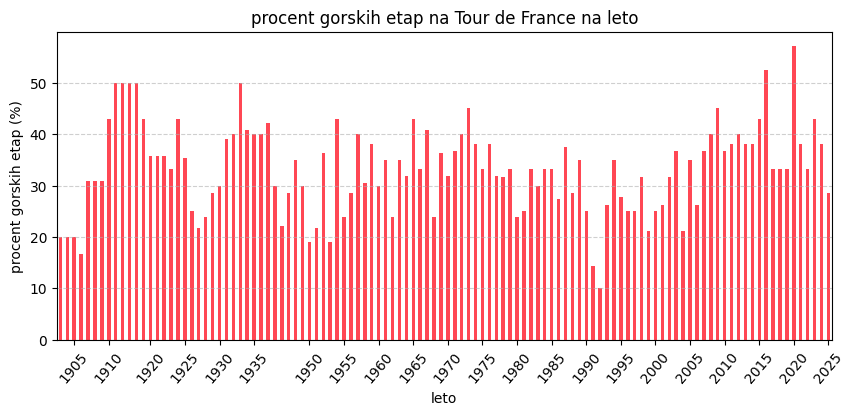

In [95]:
graf = procent_na_leto.groupby('leto')['gore'].mean()
graf5 = graf.plot(kind='bar', color='#ff4754', figsize=(10, 4))
petletja = [leto for leto in graf.index if leto % 5 == 0]
kam_petletja = [i for i, leto in enumerate(graf.index) if leto % 5 == 0]
plt.xticks(kam_petletja, petletja, rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.6)
graf5.set_ylabel("procent gorskih etap (%)")
graf5.set_title("procent gorskih etap na Tour de France na leto")
plt.show()
graf = tour.groupby('leto')['št_etap'].mean()


Z grafa razberemo, da se deleži gorskih etap na Tour-u med seboj precej razlikujejo, a prave razlage poleg tega, da je pot, po kateri vozijo kolesarji, vsako leto drugačna, nimamo (vsaj iz zajetih podatkov).






# Analiza zmagovalcev 

**Zdaj, ko smo dobili vtis o strukturi Tour de France, bi si želeli ogledati še nekaj podatkov o zmagovalcih etap in celotnega Toura.**


Tour de France je najpomembnejša tri-tedenska kolesarska dirka na svetu, ki poteka vsako leto v mesecu juliju po celotni Franciji. Sestavljena iz (zdaj) 21 etap oz. enodnevnih dirk. *Drugi dve najpomembnejši tri-tedenski kolesarsi dirki sta še La Vuelta, ki poteka septembra v Španiji, in Giro, ki poteka maja v Italiji.* Struktura Toura je večplastna; to namreč ni dirka, kjer vsak kolesar dirka sam zase, pač pa na njem nastopijo ekipe, v katerih imajo člani različne vloge: eden izmed njih (kapetan) se poteguje za zmago v skupnem seštevku (v angleščini je pogosto uporabljen izraz *General Certification* ali kar kratica *GC*), torej da bo njegov skupni čas na vseh etapah najkrajši, drugi pa so njegovi "pomočniki", torej mu nudijo zavetrje, mu v kriznih trenutkih dajo svoje kolo in zanj taktično ustvarijo priložnosti za prevzem prednosti. Kljub temu pa se seveda vsi lahko potegujejo za etapne zmage. Tako kot se etape razlikujejo med seboj (hribovita, gorska, ravninska, vožnja na čas oziroma time trial) imajo tudi vsi kolesarji svojo "posebnost" torej področje, na katerem najbolj blestijo (šprint, kolesarjenje navkreber, enodnevne dirke,...). V tem podpoglavju si bomo zato posebej ogledali podatke o zmagovlcih etap in o zmagovalcih Toura. Drugače se kolesarji na Touru lahko potegujejo tudi za naslove najboljšega šprinterja, ki nosi zeleno majico, najbolšega plezalca, torej najboljšega kolesarja na gorskih etapah (v francoščini *le Roi de la montagne*), ki nosi pikčasto majico in najboljšega mladega kolesarja pod 25 (nosi belo majico). Zmagovalec v skupnem seštevku nosi na Tour de France rumeno majico. 
*Komentar: Podatkov o najboljših šprinterjih, plezalcih in mladih kolesarjih nismo zajeli, saj imamo že dovolj podatkov za analizo, tu so bolj za to, da nekomu, ki se ne spozna na Tour, orišejo potek in delovanje dirke.*

## Zmagovalci etap

Najprej poglejmo, katere države imajo največ etapnih zmag. Sicer v kolesarstvu narodnost ne igra velike vloge; ekipe so namreč internacionalne, a kljub temu nam lahko to pove, v katerih državah je kolesarstvo bolj zastopan šport in katere države so najpogosteje sodelovale na Touru.

*Opomba: Pri pobiranju podatkov nismo upoštevali etap, ki imajo na spletni strani oznako "TTT" (Team Time Trial) (pobrali smo le enega zmagovalca, ne pa cele ekipe) in ki so razdeljene na "a" in "b" del (nismo upoštevali "b" dela), saj ima v teh primerih spletna stran drugačno strukturo. Zaradi tega se naše statistike malce razlikujejo od uradnih.*

*Opomba: V tej projektni nalogi ne bomo analizirali podatkov o ekipi zmagovalca, čeprav je ta pomembnejša od države, saj se imena ekip neprestano spreminjajo zaradi sponzorjev ekipe, tako da je težko ugotoviti, npr. katera ekipa ima največ zmagovalcev etap.*

In [96]:
etape_na_drzavo = df['narodnost zmagovalca'].value_counts()
zmaga = pd.DataFrame(etape_na_drzavo)
zmaga = zmaga.reset_index()
zmaga = zmaga.rename(columns={'count': 'etapne zmage', 'narodnost zmagovalca': 'kratica države'})
zmaga = zmaga.reset_index(drop=True)
zmaga.index += 1
zmaga.head(10)

,kratica države,etapne zmage
1,FR,638
2,BE,437
3,IT,241
4,NL,158
5,ES,122
6,DE,87
7,GB,75
8,LU,68
9,CH,49
10,AU,49


Ne preseneti nas, da ima največ etapnih zmag Francija; ne samo, da je to Tour de **France**, ampak so na začetku prirejanja Toura v večini tekmovali kolesarji iz Francije in le okoliških držav (Belgija, Nizozemska, Italija, Švica). Poglejmo še stolpični diagram za lažjo predstavo:

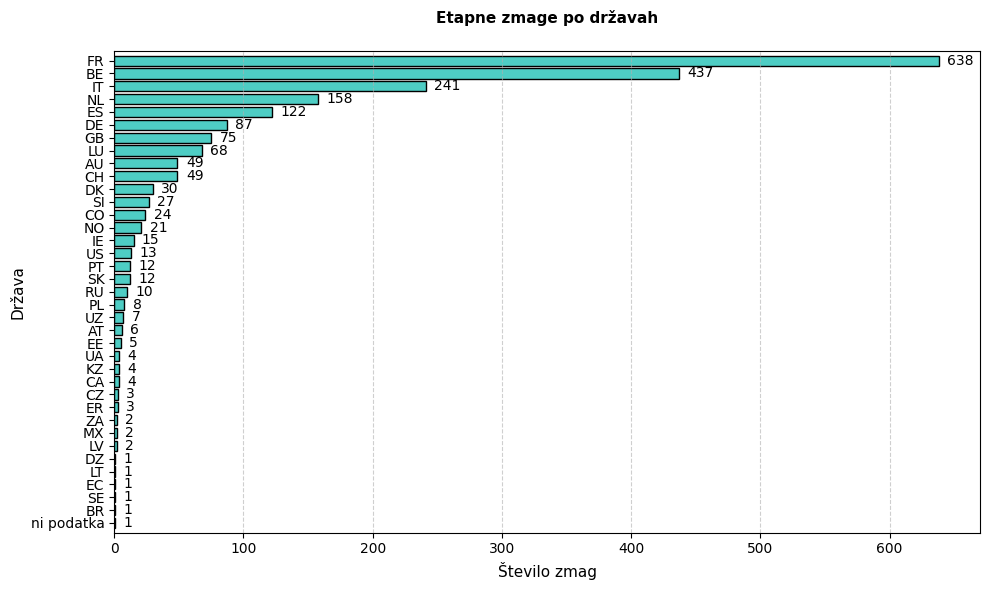

In [97]:
plt.figure(figsize=(10, 6))
sorted_df = zmaga.sort_values('etapne zmage')
bars = plt.barh(sorted_df['kratica države'], sorted_df['etapne zmage'], color='#4ecdc4', edgecolor='black')
plt.bar_label(bars, fmt='%d', padding=6, fontsize=10, color='black')
plt.title('Etapne zmage po državah', fontsize=11, fontweight='bold', pad=20)
plt.xlabel('Število zmag', fontsize=11)
plt.ylabel('Država', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()


Slovenija ima 27 etapnih zmag, kar je zelo veliko, glede na to, da je bil prvi Slovenec na Tour de France Primož Čerin leta 1989 na 76. ediciji Toura. Poglejmo še, kdaj in kdo je bil prvi Slovenec, ki je zmagal etapo na Touru:

In [98]:
slovenske_zmage = df[df['narodnost zmagovalca'] == 'SI'].sort_values(['leto', 'etapa'])
prva_slo_zmaga = slovenske_zmage.iloc[0] #vemo, da obstajajo o
print(f"Prva etapa, ki jo je zmagal Slovenec, je bila {int(prva_slo_zmaga['etapa'])
}. etapa leta {prva_slo_zmaga['leto']}, ki jo je zmagal {prva_slo_zmaga['ime in priimek zmagovalca']}, ki je tedaj vozil za {prva_slo_zmaga['ekipa zmagovalca']}.")

Prva etapa, ki jo je zmagal Slovenec, je bila 17. etapa leta 2017, ki jo je zmagal Primož Roglič, ki je tedaj vozil za Team LottoNL-Jumbo.


*Komentar: Glede na to, da je bila prva etapna zmaga za Slovenijo beležena šele leta 2017 in imamo tako v času devetih Tourou že 27 etapnih zmag, res priča o tem, kako je Slovenija postala kolesarska velesila.*

Poglejmo, kdo so drugi slovenski kolesarji poleg Pogačarja in Rogliča, ki so zmagali etapo na Tour de France:

In [99]:
slo_zmage = (df[df['narodnost zmagovalca'] == 'SI'].groupby('ime in priimek zmagovalca').size().reset_index(name='zmage na etapi').sort_values('zmage na etapi', ascending=False))
slo_zmage

,ime in priimek zmagovalca,zmage na etapi
2,Tadej Pogačar,21
0,Matej Mohorič,3
1,Primož Roglič,3


*Komentar: Čeprav Matej Mohorič ni tako znan kot Primož Roglič in Tadej Pogačar, je super kolesar in izjemno simpatičen na intervjujih po dirkah!*

Vidimo, da ima Pogačar kar 21 etapnih zmag od leta 2020, ko je prvič tekmoval (in zmagal) na Touru. Poglejmo, kdaj je dobil svojo prvo etapno zmago in zadnjo (do zdaj):


In [100]:
pogi_df = df[df['ime in priimek zmagovalca'] == 'Tadej Pogačar'].reset_index(drop=True)
prva_etapa = pogi_df.iloc[0]
zadnja_etapa = pogi_df.iloc[-1]
print(f"Tadej Pogačar, kolesarski fenomen, je svojo prvo etapo na Touru zmagal leta {prva_etapa['leto']}, "
    f"ko je vozil za {prva_etapa['ekipa zmagovalca']} in je zmagal {int(prva_etapa['etapa'])}. etapo. To je bila   {prva_etapa['profil_etape']}, "
    f"dolga {prva_etapa['razdalja']} km, ki jo je prevozil s povprečno hitrostjo {prva_etapa['povprecna_hitrost_v_km/h']} km/h.")
print(f"Svojo zadnjo etapo je zmagal za {zadnja_etapa['ekipa zmagovalca']} leta {zadnja_etapa['leto']}, ko je s povprečno hitrostjo {zadnja_etapa['povprecna_hitrost_v_km/h']} km/h "
      f"prevozil {zadnja_etapa['razdalja']} km dolgo etapo,               ki je bila {zadnja_etapa['profil_etape']}, in tako dobil {int(zadnja_etapa['etapa'])}. etapo in svojo 35. etapno zmago.")

Tadej Pogačar, kolesarski fenomen, je svojo prvo etapo na Touru zmagal leta 2020, ko je vozil za UAE Team Emirates in je zmagal 9. etapo. To je bila   gorska etapa z ravnim ciljem, dolga 153.0 km, ki jo je prevozil s povprečno hitrostjo 39.02 km/h.
Svojo zadnjo etapo je zmagal za UAE Team Emirates - XRG leta 2025, ko je s povprečno hitrostjo 28.435 km/h prevozil 10.9 km dolgo etapo,               ki je bila gorska etapa z vzponom na cilju, in tako dobil 13. etapo in svojo 35. etapno zmago.


*Komentar: Vidimo, da Pogačar blesti v gorah, kar bomo videli tudi pozneje pri analizi zmagovalcev Toura.*


Poglejmo zdaj še, kateri kolesar ima za Francijo, Belgijo in Italijo, torej za države z največ etapnimi zmagami, največ etapnih zmag:

In [101]:
etape_na_kolesarja = df.groupby(['narodnost zmagovalca', 'ime in priimek zmagovalca']).size().reset_index(name='etapne zmage2')
največ_zmag_na_dr = etape_na_kolesarja.loc[etape_na_kolesarja.groupby('narodnost zmagovalca')['etapne zmage2'].idxmax()]
največ_zmag_na_dr = pd.DataFrame(največ_zmag_na_dr.sort_values('etapne zmage2', ascending=False))
za_fra = največ_zmag_na_dr[največ_zmag_na_dr['narodnost zmagovalca'] == 'FR'].iloc[0]
za_it = največ_zmag_na_dr[največ_zmag_na_dr['narodnost zmagovalca'] == 'IT'].iloc[0]
za_be = največ_zmag_na_dr[največ_zmag_na_dr['narodnost zmagovalca'] == 'BE'].iloc[0]
print(f"Največ etapnih zmag za Francijo je dobil {za_fra['ime in priimek zmagovalca']} z {za_fra['etapne zmage2']} zmagami,"
      f" za Italijo {za_it['ime in priimek zmagovalca']} z {za_it['etapne zmage2']} zmagami,"
      f" za Belgijo pa je dobil največ etapnih  zmag {za_be['ime in priimek zmagovalca']} z {za_be['etapne zmage2']} zmagami.")

Največ etapnih zmag za Francijo je dobil Bernard Hinault z 24 zmagami, za Italijo Mario Cipollini z 13 zmagami, za Belgijo pa je dobil največ etapnih  zmag Eddy Merckx z 23 zmagami.


*Opomba: Bernard Hinault ima v uradnih statistikah beleženo 28 zmag, Eddy Merckx pa 34*

Zdaj lahko tudi pogledamo, kdo ima skupno največ etapnih zmag: 

In [102]:
največ_zmag_na_dr = največ_zmag_na_dr.reset_index(drop=True)
največ_zmag_na_dr.index += 1
največ_zmag_na_dr



,narodnost zmagovalca,ime in priimek zmagovalca,etapne zmage2
1,GB,Mark Cavendish,33
2,FR,Bernard Hinault,24
3,BE,Eddy Merckx,23
4,SI,Tadej Pogačar,21
5,LU,François Faber,19
6,DE,Erik Zabel,16
7,AU,Robbie McEwen,16
8,IT,Mario Cipollini,13
9,SK,Peter Sagan,12
10,NO,Thor Hushovd,11


Popravimo vrednosti glede na uradne podatke (načeloma ne bomo popravljali statistik, tudi če se rahlo razlikujejo od uradnih, a ker je Eddy Merckx očitno zmagal na tako veliko etapah, ki jih zaradi drugačne strukture strani nismo pobirali, da je vrstni red napačen, bomo v tem primeru statistiko vseeno popravili):

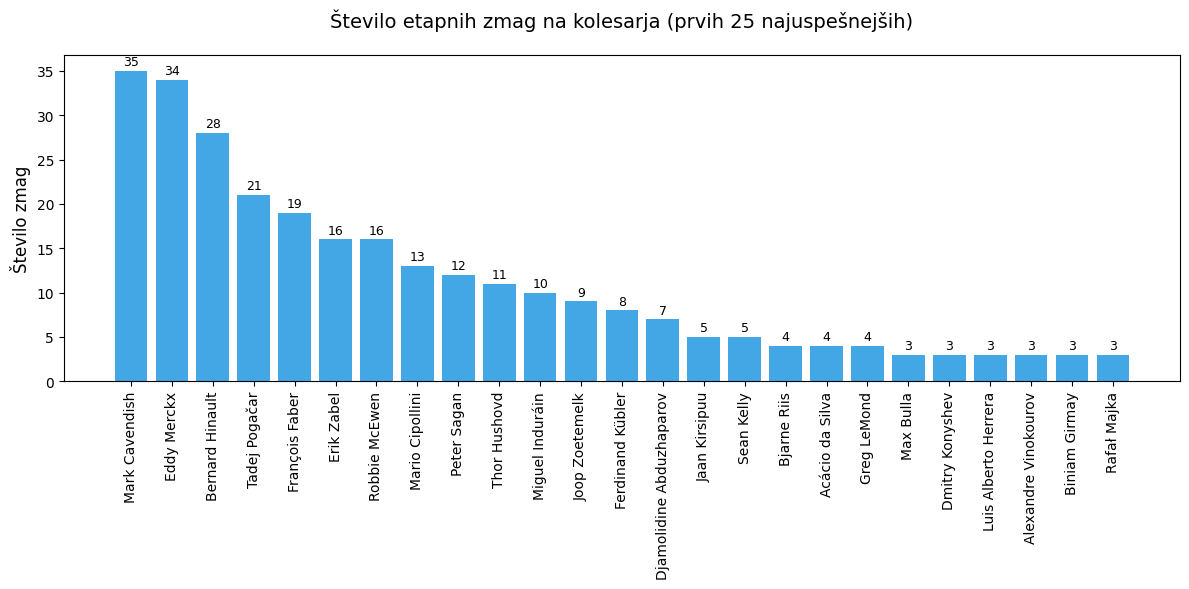

In [103]:
etape_max = največ_zmag_na_dr.head(25)
etape_max.loc[etape_max['narodnost zmagovalca'] == 'GB', 'etapne zmage2'] = 35
etape_max.loc[etape_max['narodnost zmagovalca'] == 'FR', 'etapne zmage2'] = 28
etape_max.loc[etape_max['narodnost zmagovalca'] == 'BE', 'etapne zmage2'] = 34
etape_max = etape_max.sort_values('etapne zmage2', ascending=False)
#GRAF
plt.figure(figsize=(12, 6))
bars = plt.bar(etape_max['ime in priimek zmagovalca'], etape_max['etapne zmage2'], color='#43a7e6')
plt.xticks(rotation=90, ha='center',fontsize=10)
for bar in bars:
    vis = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, vis + 0.3, f'{int(vis)}', ha='center',va='bottom',fontsize=9)

plt.ylabel('Število zmag', fontsize=12)
plt.title('Število etapnih zmag na kolesarja (prvih 25 najuspešnejših)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Poglejmo podrobneje prvih pet:

In [104]:
največ_zmag_na_dr = največ_zmag_na_dr.reset_index(drop=True)
največ_zmag_na_dr.index += 1
največ_zmag_na_dr.sort_values('etapne zmage2', ascending=False).head(5)


,narodnost zmagovalca,ime in priimek zmagovalca,etapne zmage2
1,GB,Mark Cavendish,35
3,BE,Eddy Merckx,34
2,FR,Bernard Hinault,28
4,SI,Tadej Pogačar,21
5,LU,François Faber,19


Vidimo, da ima največ etapnih zmag Mark Cavendish, ki je leta 2023 naznanil, da se bo po Touru, na katerega je vstopal z dobljenimi 34 etapnimi zmagami, upokojil. Namen je imel, da bo na tem Touru dobil še 35. etapo in tako premagal legendo cestnega kolesarstva, Eddy-ja Merckx-a, ki je končal kariero s 34 etapami (Mercx je res kolesarska legenda; na svojem vrhuncu je zmagal vsako tretjo dirko, ki se je je udeležil). Na žalost si je Cavendish v 8. etapi zaradi padca glavnine zlomil ključnico in je moral Tour predčasno zapustiti. Zato je leta 2024 prišel na Tour še enkrat, zadnjič, tam zmagal svojo 35. etapo in tako svojo profesionalno kolesarsko kariero zaključil na legendaren način.

Poglejmo, kdaj je bla Cavendishova prva in zadnja etapna zmaga na Touru:

In [105]:
mark_df = df[df['ime in priimek zmagovalca'] == 'Mark Cavendish'].reset_index(drop=True)
prva_etapa = mark_df.iloc[0]
zadnja_etapa = mark_df.iloc[-1]


In [106]:
print(f"Mark Cavendish, ki je eden najboljših šprinterjev, je svojo prvo etapo na Touru zmagal leta {prva_etapa['leto']}, "
    f"ko je vouil za {prva_etapa['ekipa zmagovalca']} in je zmagal {prva_etapa['etapa']}. etapo. To je bila {prva_etapa['profil_etape']}, "
    f"dolga {prva_etapa['razdalja']} km, ki jo je prevozil s povprečno hitrostjo {prva_etapa['povprecna_hitrost_v_km/h']} km/h.")
print(f"Svojo zadnjo etapo je zmagal za {zadnja_etapa['ekipa zmagovalca']} leta {zadnja_etapa['leto']}, ko je s povprečno hitrostjo {zadnja_etapa['povprecna_hitrost_v_km/h']} km/h "
      f"prevozil {zadnja_etapa['razdalja']} km dolgo etapo, ki je bila {zadnja_etapa['profil_etape']}, in tako dobil {prva_etapa['etapa']}. etapo in svojo 35. etapno zmago.")

Mark Cavendish, ki je eden najboljših šprinterjev, je svojo prvo etapo na Touru zmagal leta 2008, ko je vouil za Team Columbia in je zmagal 5.0. etapo. To je bila ravninska etapa, dolga 232.0 km, ki jo je prevozil s povprečno hitrostjo 42.456 km/h.
Svojo zadnjo etapo je zmagal za Astana Qazaqstan Team leta 2024, ko je s povprečno hitrostjo 42.787 km/h prevozil 177.4 km dolgo etapo, ki je bila ravninska etapa, in tako dobil 5.0. etapo in svojo 35. etapno zmago.


*Komentar: Tip etap, ki jih je zmagal Cavendish, nas ne preseneti, saj so ravninske etape najbolj ustrezne za šprinterje.*

Kljub temu, da Mark Cavendish drži rekord za največ etapnih zmag na Tour de France, pa ni nikoli zmagal Toura v celoti. Preverimo:

In [107]:
mark_zmaga_tdf = df2['zmagovalec tdf'].value_counts().get('Mark Cavendish', 0)
print(f"Mark Cavendish je celotno dirko Tour de France zmagaal {int(mark_zmaga_tdf)}-krat.")

Mark Cavendish je celotno dirko Tour de France zmagaal 0-krat.


V nasprotnem primeru so Hinault, Faber,  Pogačar in Mercx zmagali na Tour de France vsaj enkrat:

In [108]:
pogi_zmaga_tdf = df2['zmagovalec tdf'].value_counts().get('Tadej Pogačar', 0)
merckx_zmaga_tdf = df2['zmagovalec tdf'].value_counts().get('Eddy Merckx', 0)
hinault_zmaga_tdf = df2['zmagovalec tdf'].value_counts().get('Bernard Hinault', 0)
faber_zmaga_tdf = df2['zmagovalec tdf'].value_counts().get('François Faber', 0)
print(f"Eddy Merckx je zmagal na Touru {merckx_zmaga_tdf}-krat, Bernard Hinault {hinault_zmaga_tdf}-krat, François Faber {faber_zmaga_tdf}-krat in Tadej Pogačar za zdaj"
      f"(vsi ostali niso več aktivni) {pogi_zmaga_tdf}-krat.")

Eddy Merckx je zmagal na Touru 5-krat, Bernard Hinault 5-krat, François Faber 1-krat in Tadej Pogačar za zdaj(vsi ostali niso več aktivni) 4-krat.


## Zmagovalci Tour de France

Poglejmo še nekaj statistik o zmagovalcih Tour de France. Zmagovalec Tou de France je torej tisti kolesar, ki je najboljši v skupnem seštevku. Za to bomo rabili razpredelnico, ki po letih predstavi podatke o zmagovalcih. Eden od podatkov je "posebnost" kolesarja, torej v čem je najboljši. Tu je kratka legenda posebnosti (povzeto po https://www.procyclingstats.com/info/rider-specialties):


- **GC** : Kolesar ima največ pik zbranih na vseh končnih GC uvrstitvah v svoji karieri. Kolesar s posebnostjo GC je recimo Kolumbijec Nairo Quintana
- **Plezalec (Climber)**: Največ pik je kolesar osvojil na gorskih etapah in dirkah. Dobra plezalca sta recimo Ekvadorec Victor Carapaz in Tadej Pogačar.
- **Dirka na čas (Time Trial)** : Največ pik je kolesar osvojil na dirkah na čas. Dobra TT kolesarja sta Primož Roglič in Italijan Filippo Ganna.
- **Šprint** : Največ pik je kolesar osvojil na šprinterskih dirkah in etapah. Dobra šprinterja sta Belgijca Jasper Philipsen in Wout Van Aert.
- **Classic**: To je zastarel izraz, ampak najverjetneje bi ga zdaj umestili nekje med izraz **GC** in **Enodnevne dirke**. Ker pa ni čisto jasno, ga bomo obravnavali kot izraz zase.



In [109]:
df2 = df2.rename(columns={'zmagovalec specialty' : 'posebnost'})
df2 = df2.reset_index(drop=True)
df2.index += 1
df2

,leto,zmagovalec tdf,zmagovalec tdf drzava,zmagovalec tdf starost,posebnost
1,1903,Maurice Garin,FR,32,Classic
2,1904,Maurice Garin,FR,33,Classic
3,1905,Louis Trousselier,FR,24,Classic
4,1906,René Pottier,FR,27,Climber
5,1907,Lucien Petit-Breton,FR,24,Climber
...,...,...,...,...,...
108,2021,Tadej Pogačar,SI,22,Climber
109,2022,Jonas Vingegaard,DK,25,GC
110,2023,Jonas Vingegaard,DK,26,GC
111,2024,Tadej Pogačar,SI,25,Climber


In [110]:
df2= df2[df2['zmagovalec tdf drzava'] != 'ni podatka'] #izločimo leta, ko je zmagoval Lance Armstrong

**POSEBNOST**

Poglejmo najprej, katera posebnost se najbolj in najmanj obrestuje kolesarjem, če želijo zmagati na Touru (zmagovalcev katere posebnosti je bilo največ in najmanj):

<Figure size 500x500 with 0 Axes>

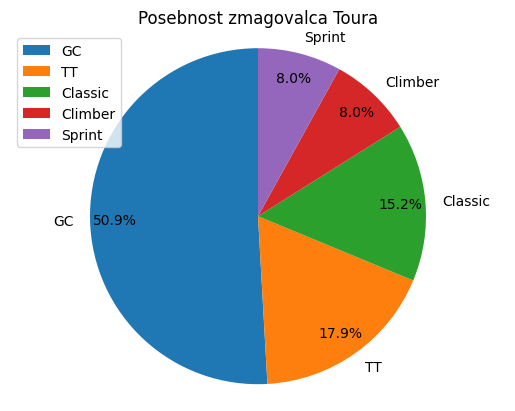

In [111]:
posebnosti = df2['posebnost'].value_counts().reset_index()
posebnosti.columns = ['posebnost', 'count']
plt.figure(figsize=(5, 5))
plot = posebnosti.plot.pie(y='count',labels=posebnosti['posebnost'],autopct='%1.1f%%',startangle=90,pctdistance=0.85) 

plt.axis('equal')
plt.ylabel('')
plt.title('Posebnost zmagovalca Toura')
plt.show()

Ne preseneča nas, da je več kot pol vseh zmagovalcev Toura imelo posebnost *GC*. Najmanjkrat so zmagali šprinterji in plezalci. Še posebej za šprinterje ni presenetljivo, da najmanjkrat zmagujejo, saj imajo večjo maso in tako na gorskih etapah težje dohajajo glavnino (letos je skupina z zelenim dresom (šprinterji) na gorskih etapah zmeraj vozila vsaj 10 minut za glavnino. 

Zgoraj smo izračunali leti, ko je bilo največ in najmanj gorskih etap. Poglejmo, ali je na najbolj gorskem Touru zmagal plezalec in ali je na najmanj gorskem Touru zmagal kakšen šprinter. Poglejmo še, ali je leta, ko je bilo največ dirk na čas, zmagal kolesar s posebnostjo TT. 

*Komentar: Oznaka 'ni podatka' se pojavlja na prvih enajstih edicijah Toura, ko cestno kolesarstvo še ni imelo takih klasifikacij kot so posebnost.*

In [112]:
#še enkrat pogledamo podatke, ki nas zanimajo:
največje_število_tt = tour1.loc[tour1['tt_st'].idxmax()]
print(f"Največje število TT etap na enem Tour-u je bilo {int(največje_število_tt['tt_st'])} etap leta {int(največje_število_tt['leto'])}, ko so na TT delu Toura prevozili kar {največje_število_tt['tt_razdalja']} km.")
procent_na_leto = procent_na_leto.reset_index()
procent_na_leto.sort_values(by='gore', ascending=False).head(10)
največ_vrstica = procent_na_leto.loc[procent_na_leto['gore'].idxmax()]
najmanj_vrstica = procent_na_leto.loc[procent_na_leto['gore'].idxmin()]
print(f"Najmanjši delež gorskih etap je bil leta {int(najmanj_vrstica['leto'])}, ko je znašal {najmanj_vrstica['gore']}%, največji pa je bil leta {int(največ_vrstica['leto'])} z {največ_vrstica['gore']}%.")


Največje število TT etap na enem Tour-u je bilo 5 etap leta 1988, ko so na TT delu Toura prevozili kar 222.0 km.
Najmanjši delež gorskih etap je bil leta 1992, ko je znašal 10.0%, največji pa je bil leta 2020 z 57.1%.


In [113]:
tt_leto = df2[df2['leto'] == 1988]
gore_leto = df2[df2['leto'] == 2020]
ravno_leto = df2[df2['leto'] == 1992]


In [114]:
tt_leto

,leto,zmagovalec tdf,zmagovalec tdf drzava,zmagovalec tdf starost,posebnost
75,1988,Pedro Delgado,ES,28,GC


In [115]:
gore_leto

,leto,zmagovalec tdf,zmagovalec tdf drzava,zmagovalec tdf starost,posebnost
107,2020,Tadej Pogačar,SI,21,Climber


In [116]:
ravno_leto

,leto,zmagovalec tdf,zmagovalec tdf drzava,zmagovalec tdf starost,posebnost
79,1992,Miguel Induráin,ES,27,TT


Na leto, ko je bilo največ gorskih etap, je res zmagal plezalec, in to še Tadej Pogačar! Na leto, ko je bilo največ ravninskih etap (če sklepamo, da če je nejmanj gorskih, je največ ravninksih), je zmagal Miguel Indurain, eden najboljših španskih kolesarjev. Ni presenetljivo, da je na leto, ko je bilo več ravnih etap, zmagal kolesar, ki je najboljši v vožnji na čas. Tudi za leto, ko je bilo največ TT etap, nas ne preseneča zelo, da je zmagal kolesar, najboljši v potegovanju za GC (takšen kolesar mora biti dober povsod, tudi na TT). 

**KOLESARJI Z NAJVEČ ZMAGAMI NA TOUR DE FRANCE**

Najprej razvrstimo države po številu zmag:

In [117]:
df2= df2[df2['zmagovalec tdf drzava'] != 'ni podatka'] #Lance Armstrong je označen kot 'ni podatka', saj so mu vseh 7 Lzmag odvzeli zaradi dopinga
df2.loc[df2['leto'] == 2006, 'zmagovalec tdf'] = 'Óscar Pereiro' #Floydu Landisu je bil odvzet naziv zaradi dopinga, zato nastavimo zmagovalca na Oscarja Pereirota
tdf_na_drzavo = df2['zmagovalec tdf drzava'].value_counts()
zmaga = pd.DataFrame(tdf_na_drzavo)
zmaga = zmaga.reset_index()
zmaga = zmaga.rename(columns={'count': 'število zmag', 'zmagovalec tdf drzava': 'kratica države'})
#ker naša koda še ne predvideva, da je ZDA odvzetih 11 od 14 zmag zaradi dopinga Lancea Armstronga, bomo to popravili:
zmaga.loc[zmaga['kratica države'] == 'US', 'število zmag'] = 3 
zmaga.sort_values(by='število zmag', ascending=False)

,kratica države,število zmag
0,FR,36
1,BE,18
2,ES,12
4,IT,10
5,GB,6
6,LU,4
7,SI,4
3,US,3
8,DK,3
9,NL,2


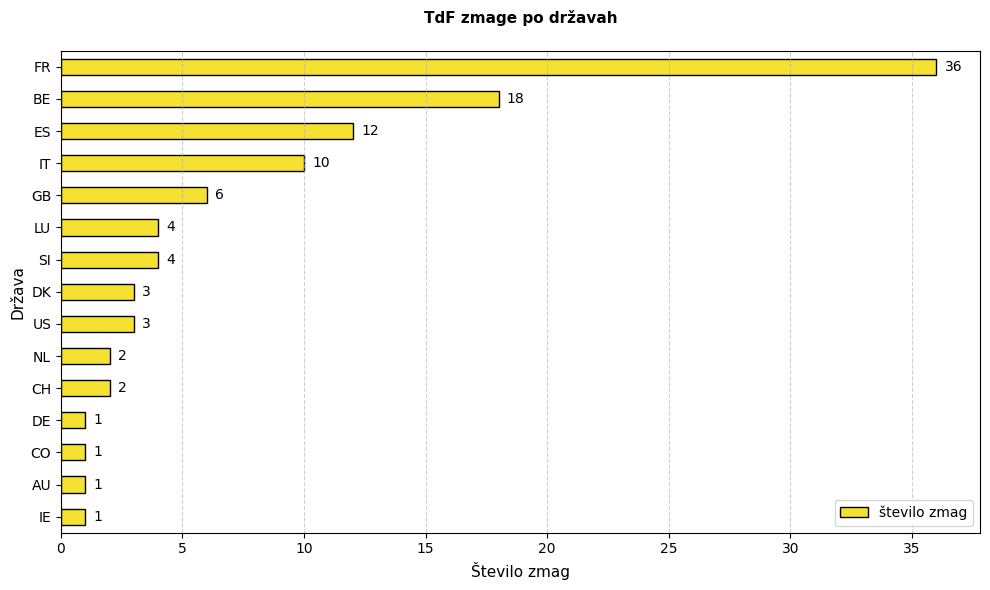

In [118]:
graf2 = zmaga.sort_values('število zmag').set_index('kratica države')
graf8 = graf2.plot(kind='barh', color='#f5e12f', figsize=(10, 6), edgecolor='black')
graf8.bar_label(graf8.containers[0], fmt='%d', padding=6, fontsize=10, color='black')
plt.title('TdF zmage po državah', fontsize=11, fontweight='bold', pad=20)
plt.xlabel('Število zmag', fontsize=11)
plt.ylabel('Država', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Kot pri številu etap, nas to, da so na vrhu Francozi in Belgijci, ne preseneča. 

Glede na to, da je prva etapna zmaga za Slovenijo nastopila šele leta 2017 in da ima že 4 zmage na celotnem Tour de France, je res osuplivo. 

Poglejmo, kdo ima v vsaki državi največ zmag na TdF:

In [119]:
# leto	zmagovalec tdf	zmagovalec tdf drzava	zmagovalec tdf starost	posebnost
na_kolesarja = df2.groupby(['zmagovalec tdf drzava', 'zmagovalec tdf']).size().reset_index(name='število zmag')
na_kolesarja = na_kolesarja[na_kolesarja['zmagovalec tdf'] != 'Lance Armstrong']
največ_zmag = na_kolesarja.loc[na_kolesarja.groupby('zmagovalec tdf drzava')['število zmag'].idxmax()]
največ_zmag = največ_zmag.sort_values('število zmag', ascending=False)
največ_zmag = največ_zmag.reset_index(drop=True)
največ_zmag.index += 1
največ_zmag


,zmagovalec tdf drzava,zmagovalec tdf,število zmag
1,BE,Eddy Merckx,5
2,ES,Miguel Induráin,5
3,FR,Bernard Hinault,5
4,GB,Chris Froome,4
5,SI,Tadej Pogačar,4
6,US,Greg LeMond,3
7,DK,Jonas Vingegaard,2
8,LU,Nicolas Frantz,2
9,IT,Fausto Coppi,2
10,AU,Cadel Evans,1


In [120]:
#Pogledamo, kateri si delijo naslov najboljšega etapnega zmagovalca in Tour zmagovalca na državo glede na naše lestvice
df_tdf = največ_zmag.rename(columns={'zmagovalec tdf': 'ime in priimek zmagovalca','zmagovalec tdf drzava': 'narodnost zmagovalca'})

merged = pd.merge(največ_zmag_na_dr, df_tdf, on=['ime in priimek zmagovalca', 'narodnost zmagovalca'])
print(merged[['ime in priimek zmagovalca', 'narodnost zmagovalca']])


  ime in priimek zmagovalca narodnost zmagovalca
0           Bernard Hinault                   FR
1               Eddy Merckx                   BE
2             Tadej Pogačar                   SI
3           Miguel Induráin                   ES
4          Ferdinand Kübler                   CH
5               Greg LeMond                   US


Vidimo, da so najboljši v skupnem seštevku za Francijo, Belgijo, Španijo, Švico, ZDA in Slovenijo tudi tisti, ki so za svojo državo nabrali največ etapnih zmag, ostali pa ne. To nam porodi vprašanje: 

**Ali je mogoče, da kolesar ne zmaga nobene etapne zmage na Touru in vseeno zmaga v skupnem seštevku?** 

In [121]:
tdf = df2[['leto', 'zmagovalec tdf', 'zmagovalec tdf starost', 'posebnost']]
etape = df.groupby('leto')['ime in priimek zmagovalca'].apply(set).reset_index()
merged = pd.merge(tdf, etape, on='leto', how='left')

merged['zmagal_etapo'] = merged.apply(lambda row: row['zmagovalec tdf'] in row['ime in priimek zmagovalca'], axis=1 )
brez_zmage_na_etapi = merged[merged['zmagal_etapo'] == False]
brez_zmage_na_etapi= brez_zmage_na_etapi[brez_zmage_na_etapi['zmagovalec tdf'] != 'Lance Armstrong']
brez_zmage_na_etapi = brez_zmage_na_etapi.reset_index(drop=True)
brez_zmage_na_etapi.index += 1
brez_zmage_na_etapi[['leto', 'zmagovalec tdf', 'zmagovalec tdf starost', 'posebnost']]



,leto,zmagovalec tdf,zmagovalec tdf starost,posebnost
1,1904,Maurice Garin,33,Classic
2,1922,Firmin Lambot,36,GC
3,1956,Roger Walkowiak,29,GC
4,1960,Gastone Nencini,30,Sprint
5,1966,Lucien Aimar,25,GC
6,1990,Greg LeMond,29,GC
7,2006,Óscar Pereiro,30,TT
8,2010,Alberto Contador,27,GC
9,2017,Chris Froome,32,GC


Rezultat je zelo zanimiv, saj je kar **devetkrat** uspelo kolesarjem ostati v prednosti na skupnem seštevku brez zmagovanja na etapah!!



**STAROST ZMAGOVALCEV**


Poglejmo, kdo je bil najmlajši zmagovalec Tour de France:

In [122]:
mlad = df2.loc[df2['zmagovalec tdf starost'].idxmin()]
leto = mlad['leto']
starost = mlad['zmagovalec tdf starost']
posebnost = mlad['posebnost']
ime_zmagovalca = mlad['zmagovalec tdf']
indeks = mlad.name 

print(f"Najmlajši kolesar, ki je zmagal Tour de France, je bil {ime_zmagovalca}, ko je leta {leto} zmagal {indeks}. edicijo Toura z {starost} leti. Njegova posebnost je        {posebnost}.")


Najmlajši kolesar, ki je zmagal Tour de France, je bil Tadej Pogačar, ko je leta 2020 zmagal 107. edicijo Toura z 21 leti. Njegova posebnost je        Climber.


Vidimo, da je Tadej Pogačar isto leto, ko je prvič nastopal na Touru dobil svojo prvo etapno zmago in še zmagal celoten Tour!

Poglejmo še, kateri je bil najstarejši:

In [123]:
star = df2.loc[df2['zmagovalec tdf starost'].idxmax()]
leto = star['leto']
starost = star['zmagovalec tdf starost']
posebnost = star['posebnost']
ime_zmagovalca = star['zmagovalec tdf']
indeks = star.name 

print(f"Najstarejši kolesar, ki je zmagal Tour de France, je bil {ime_zmagovalca}, ko je leta {leto} zmagal {indeks}. edicijo Toura s {starost} leti. Njegova posebnost je {posebnost}.")


Najstarejši kolesar, ki je zmagal Tour de France, je bil Firmin Lambot, ko je leta 1922 zmagal 16. edicijo Toura s 36 leti. Njegova posebnost je GC.


Poglejmo, koliko kolesarjev je zmagalo Tour kot  "najboljši mladi kolesar" (torej, da so bili stari manj od 26 let:


In [124]:
df2['zmagovalec tdf starost'] = pd.to_numeric(df2['zmagovalec tdf starost'])
mladi = df2[df2['zmagovalec tdf starost'] < 26] 
st = mladi['zmagovalec tdf'].value_counts().reset_index()
st.columns = ['ime', 'st']

print("Kolesarji, ki so Tour zmagali kot najboljši mladi kolesarji:")

mladi

Kolesarji, ki so Tour zmagali kot najboljši mladi kolesarji:


,leto,zmagovalec tdf,zmagovalec tdf drzava,zmagovalec tdf starost,posebnost
3,1905,Louis Trousselier,FR,24,Classic
5,1907,Lucien Petit-Breton,FR,24,Climber
6,1908,Lucien Petit-Breton,FR,25,Climber
7,1909,François Faber,LU,22,Climber
8,1910,Octave Lapize,FR,22,Classic
10,1912,Odiel Defraeye,BE,23,GC
11,1913,Philippe Thys,BE,23,GC
12,1914,Philippe Thys,BE,24,GC
29,1935,Romain Maes,BE,22,Classic
32,1938,Gino Bartali,IT,23,Sprint


In [125]:
print("\nŠtevilo takih zmag na kolesarja:")
st = st.reset_index(drop=True)
st.index += 1
st


Število takih zmag na kolesarja:


,ime,st
1,Tadej Pogačar,3
2,Eddy Merckx,2
3,Bernard Hinault,2
4,Philippe Thys,2
5,Lucien Petit-Breton,2
6,Laurent Fignon,2
7,Octave Lapize,1
8,François Faber,1
9,Louis Trousselier,1
10,Odiel Defraeye,1


Vidimo, da ima največ zmag kot mladi kolesar prav Tadej Pogačar. Poleg tega je tako zmagal kar tri od štirih zmag na Touru. 

Za konec poglejmo še, pri kateri starosti kolesarji najbolj zmagujejo Tour de France:

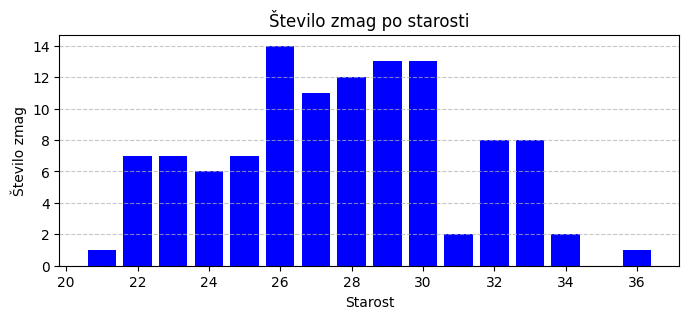

,zmagovalec tdf starost,stevilo zmag
0,26,14
1,29,13
2,30,13
3,28,12
4,27,11
5,33,8
6,32,8
7,25,7
8,22,7
9,23,7


In [126]:
starosti = df2['zmagovalec tdf starost'].value_counts().reset_index()
starosti.columns = ['zmagovalec tdf starost', 'stevilo zmag']
plt.figure(figsize=(8,3))
plt.bar(starosti['zmagovalec tdf starost'], starosti['stevilo zmag'], color='blue')
plt.xlabel('Starost')
plt.ylabel('Število zmag')
plt.title('Število zmag po starosti')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
starosti

Po analizi zmagovalcev Tour de France vidimo, da so obdobje, ko ima profesionalni kolesar možnost za zmago na Touru, leta med 26 in 30, in da ima kolesar, vsaj po podatkih iz preteklih Tourov, največ možnosti, če ima posebnost "GC".



# Zaključne misli:

Ta projektna naloga je pokazala nekaj ključnih značilnosti najpomembnejše tritedenske kolesarske dirke na svetu. Pokazala je, kako je Tour zastavljen (njegova dolžina, dolžina in število etap, delež gorskih etap, ...) in kdo ter od kod so njegovi zmagovalci (tako zmagovalci etap kot tudi celotne dirke). Analiza podatkov je pokazala tudi, da je kljub poznemu začetku sodelovanja in pozni prvi etapni zmagi Slovenija izredno uspešna na Touru. Naši kolesarji so res nadvse izjemni in nad športom navdušujejo vse več ljudi. Tudi sama se za šport zanimam že nekaj let. Na začetku me je najbolj pritegnilo to, da kolesarstvo sprva res deluje kot šport, v katerem vsak kolesar tekmuje sam zase, ampak je vbistvu ekipni šport, tako da se je res treba zavedati, da tudi zmagovalci niso zmagali sami, ampak je za njimi cela ekipa, brez katere jim ne bi uspelo. 

Upam, da je projektna naloga nekomu, ki ne spremlja športa, cestno kolesarstvo in Tour de France predstavila na razumljiv in zanimiv način, če pa je koga celo pritegnila k njemu, pa še bolje! 

P.S.: Ker je trenutno zlata doba slovenskega kolesarstva, se Slovenija poteguje za to, da bi bila leta 2029 gostiteljica "Grand Départ" Toura, torej da bi se leta 2029 Tour začel kar v Sloveniji! 